In [1]:
import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import statsmodels.api as sa
import seaborn as sns

In [9]:

df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col=['Month'])

df.rename(columns={'#Passengers':'Passengers'}, inplace=True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


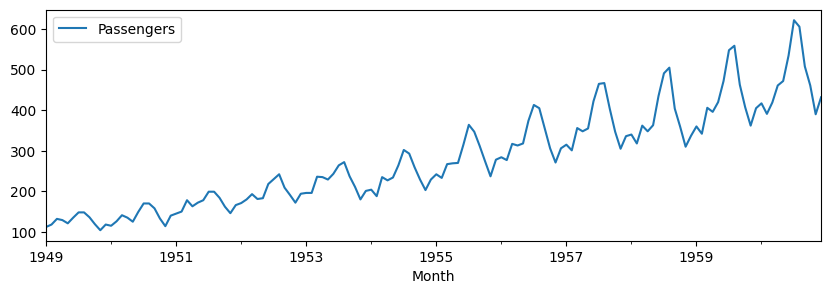

In [4]:
plt.rcParams['figure.figsize'] = [10, 3]
df.plot()
plt.show()

In [5]:
acf_value = acf(df.Passengers)
pacf_value = pacf(df.Passengers)

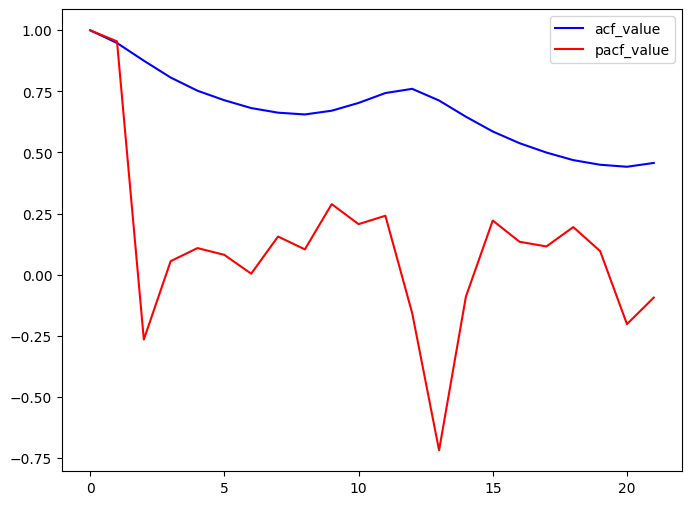

In [20]:
plt.figure(figsize=(8,6))
plt.plot(acf_value, color=('blue'))
plt.plot(pacf_value, color=('red'))
plt.legend(['acf_value', 'pacf_value'])
plt.show()

<Figure size 1600x800 with 0 Axes>

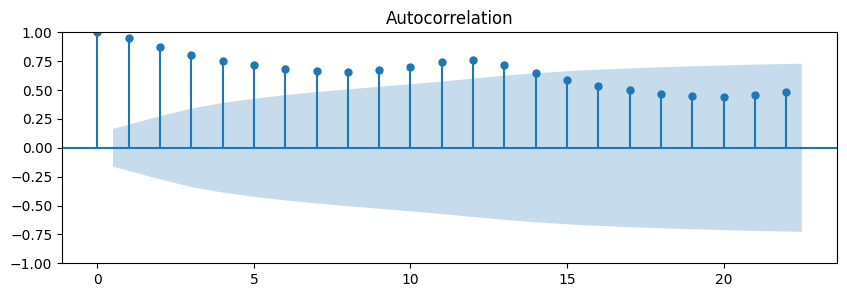

In [6]:
plt.figure(figsize=(16,8))
plot_acf(df.Passengers)
plt.show()

C:\python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

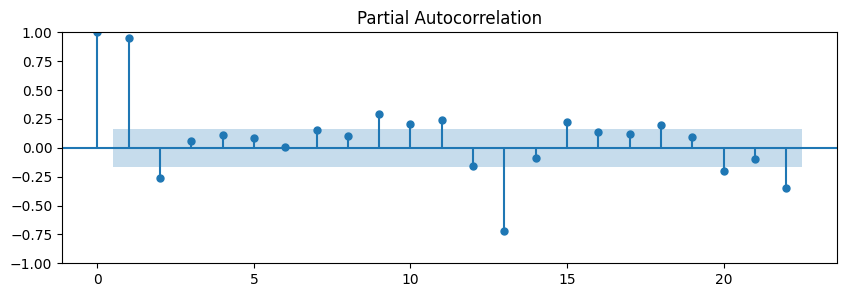

In [7]:
plt.figure(figsize=(16,8))
plot_pacf(df.Passengers)
plt.show()

In [8]:
import statsmodels.api as sa


data_model = df.Passengers[:'1960']
model = sa.tsa.ARIMA(data_model).fit()

C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
pred = model.predict('1950','1960', typ='levels')

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                          ARIMA   Log Likelihood                -893.184
Date:                Sun, 18 Jun 2023   AIC                           1790.368
Time:                        13:37:04   BIC                           1796.307
Sample:                    01-01-1949   HQIC                          1792.781
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2986     11.188     25.053      0.000     258.370     302.227
sigma2      1.429e+04   2110.493      6.771      0.000    1.02e+04    1.84e+04
===================================================================================
Ljung-Box (L1) (Q):                 132.14   Jarque-Bera (JB):                 8.92
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.49   Skew:                             0.58
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

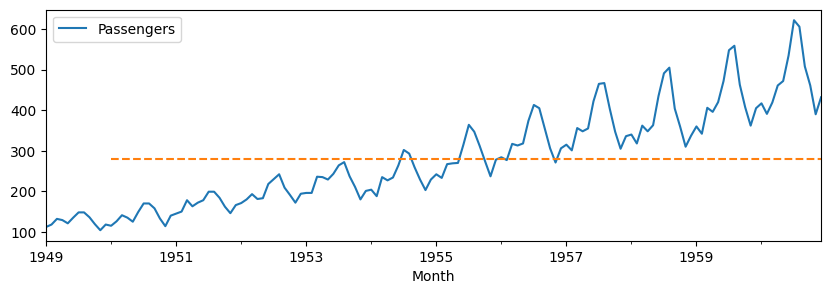

In [11]:
df.plot()
pred.plot(style='--')

In [12]:
import ml_metrics as metrics

comp = df.Passengers['1950':'1960']
metrics.rmse(comp, pred)

115.88723038702184

In [13]:
metrics.mae(comp, pred)

95.60753349576774

In [14]:
model_2 = sa.tsa.statespace.SARIMAX(data_model, seasonal_order=(2,2,2,12)).fit()

C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
pred_2 = model_2.predict('1950','1960', typ='levels')

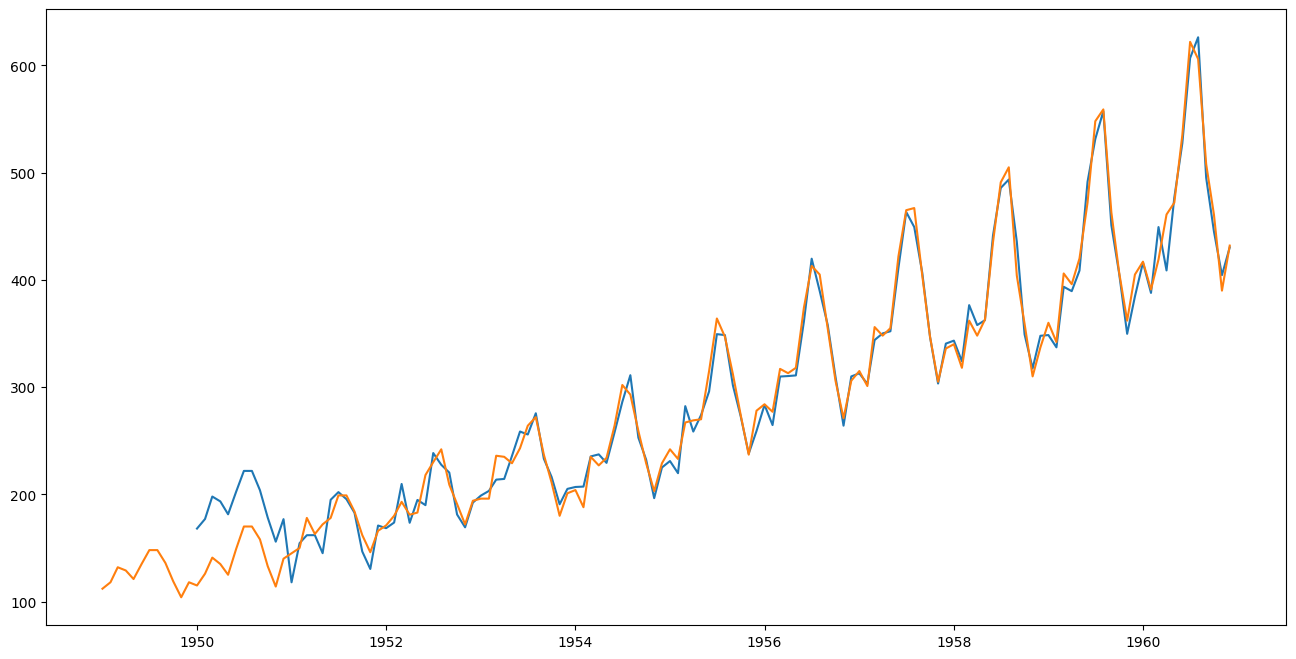

In [16]:
plt.figure(figsize=(16,8))
plt.plot(pred_2)
plt.plot(data_model)
plt.show()

In [17]:
metrics.rmse(comp, pred_2)

19.395625966573736

In [18]:
metrics.mae(comp, pred_2)

13.31531476051597

In [19]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                              Passengers   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -475.054
Date:                                 Sun, 18 Jun 2023   AIC                            962.108
Time:                                         13:37:33   BIC                            978.833
Sample:                                     01-01-1949   HQIC                           968.900
                                          - 12-01-1960                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7698      0.074     10.436      0.000       0.625       0.914
ar.S.L12      -1.1747      0.957     -1.228      0.220      -3.050       0.701
ar.S.L24      -0.1762      0.321     -0.549      0.583      -0.806       0.453
ma.S.L12       0.0033      3.472      0.001      0.999      -6.802       6.809
ma.S.L24      -0.9755      2.722     -0.358      0.720      -6.311       4.360
sigma2       120.6559    249.373      0.484      0.629    -368.107     609.419
===================================================================================
Ljung-Box (L1) (Q):                  11.74   Jarque-Bera (JB):                35.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             0.23
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from pandas import DataFrame
from pandas import concat

In [23]:
df_value = DataFrame(df.values)

dataframe = concat([df_value.shift(1), df_value], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()

In [24]:
result

,t-1,t+1
t-1,1.000000,0.960195
t+1,0.960195,1.000000


In [25]:
value = DataFrame(df.values)

data = concat([value.shift(1), value], axis=1)
data.columns = ['t-1','t+1']

res = data.corr()
res



,t-1,t+1
t-1,1.000000,0.960195
t+1,0.960195,1.000000


In [26]:
from pandas.plotting import autocorrelation_plot

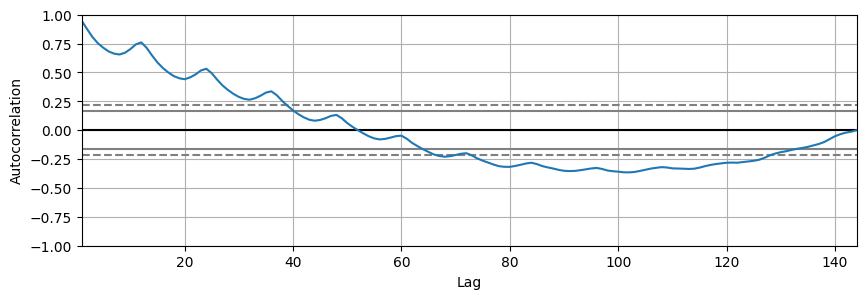

In [27]:
autocorrelation_plot(df)
plt.show()

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

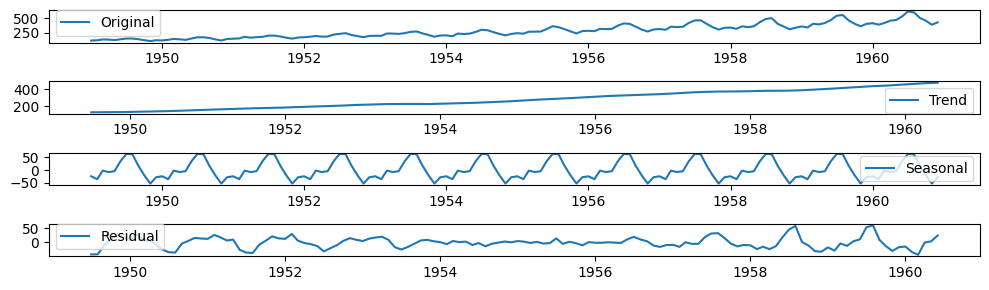

In [30]:
decomposition = seasonal_decompose(df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

In [39]:
from statsmodels.tsa.stattools import adfuller

def sesonal(data, s):
    plt.figure(figsize=(19,8), dpi= 80)
    for i, y in enumerate(data.index.year.unique()):
        plt.plot(list(range(1,len(data[data.index.year==y])+1)), data[data.index.year==y][data.columns[0]].values, label=y)
    plt.title("Сезонність по періодам")
    plt.legend(loc="best")
    plt.show()
    
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    print("Тест на стаціонарність:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значення = {:.3f}".format(dftest[1]))
    print("Критичне значення :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Дані {} стационарні з ймовірністю {}% відсотків".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))
    
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартна похибка:', round(((real-forecast)**2).mean()**0.5,4)) 

In [42]:
metrics(df, model_2.forecast(len(df)))

Тест на стаціонарність:
	T-статистика = -2.001
	P-значення = 0.286
Критичне значення :
	1%: -3.4816817173418295 - Дані не стационарні з ймовірністю 99% відсотків
	5%: -2.8840418343195267 - Дані не стационарні з ймовірністю 95% відсотків
	10%: -2.578770059171598 - Дані не стационарні з ймовірністю 90% відсотків
MAD: 400.9717
MSE: 166207.435
MAPE: 1.6962
MPE: -1.6962
Стандартна похибка: 407.6855


In [45]:
metrics(df, model.forecast(len(df)))

Тест на стаціонарність:
	T-статистика = 0.815
	P-значення = 0.992
Критичне значення :
	1%: -3.4816817173418295 - Дані не стационарні з ймовірністю 99% відсотків
	5%: -2.8840418343195267 - Дані не стационарні з ймовірністю 95% відсотків
	10%: -2.578770059171598 - Дані не стационарні з ймовірністю 90% відсотків
MAD: 100.4429
MSE: 14291.9733
MAPE: 0.4425
MPE: -0.21
Стандартна похибка: 119.549
